# THIS IS THE BEGINNING OF SOMETHING GREAT

In [108]:
import pandas as pd
import numpy as np
import sklearn as sk
import seaborn as sb
import pickle

In [109]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
%matplotlib inline

In [110]:
pd.options.mode.chained_assignment = None
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows', None)

In [111]:
path_x = r'C:\Users\Adamin\Documents\Alpha'
path = r'/vol/sci/astro/bigdata/tussbaum/halofinder/catalog/'
path_1 = r'/vol/sci/astro/home/adambeilialpha/'


In [112]:
sgal_qlabel_0 = pd.read_pickle(path_1 + r'/sgal_qlabel_0.pkl')
sgal_qlabel_1 = pd.read_pickle(path_1 + r'/sgal_qlabel_1.pkl')

In [116]:
#sgal_qlabel.to_pickle(path_1+r'/sgal_qlabel_surv.pkl')
sgal_qlabel_surv = pd.read_pickle(path_1 + r'/sgal_qlabel_surv.pkl')
#sgal_qlabel_resized = pd.read_pickle(path_1 + r'/sgal_qlabel_resized.pkl')
sgal_features = pd.read_pickle(path_1 + r'/sgal_features_cat.pkl')
sgal_qlabel = pd.read_pickle(path_1 + r'/sgal_qlabel.pkl')

In [117]:
print len(sgal_qlabel_surv.keys().values),len(sgal_qlabel_surv)

401 118


In [115]:
print len(sgal_qlabel.keys().values),len(sgal_qlabel),sgal_qlabel.keys().values

596 118 ['CGH_Mtot(Rorbit)[Msun]' 'CGH_gas_density(Rorbit+-Rsat)[Msun/kpc^3]'
 'Fgrav' 'Fram' 'Ftidal' 'Mcg(R0.5kpc)[Msun]' 'Mcg(R1kpc)[Msun]'
 'Mcg(R1min)[Msun]' 'Mcg(Reff)[Msun]' 'Mcg(Rs0.05)[Msun]'
 'Mcg(Rs0.1)[Msun]' 'Mcg(Rsat)[Msun]' 'Mcg(Rsat_0.8)[Msun]'
 'Mcg(Rsat_0.9)[Msun]' 'Mcg(Rzana)[Msun]' 'Mdm(R0.5kpc)[Msun]'
 'Mdm(R1kpc)[Msun]' 'Mdm(R1min)[Msun]' 'Mdm(Reff)[Msun]'
 'Mdm(Rs0.05)[Msun]' 'Mdm(Rs0.1)[Msun]' 'Mdm(Rsat)[Msun]'
 'Mdm(Rsat_0.8)[Msun]' 'Mdm(Rsat_0.9)[Msun]' 'Mdm(Rzana)[Msun]'
 'Mgas(R0.5kpc)[Msun]' 'Mgas(R1kpc)[Msun]' 'Mgas(R1min)[Msun]'
 'Mgas(Reff)[Msun]' 'Mgas(Rs0.05)[Msun]' 'Mgas(Rs0.1)[Msun]'
 'Mgas(Rsat)[Msun]' 'Mgas(Rsat_0.8)[Msun]' 'Mgas(Rsat_0.9)[Msun]'
 'Mgas(Rzana)[Msun]' 'Mncg(R0.5kpc)[Msun]' 'Mncg(R1kpc)[Msun]'
 'Mncg(R1min)[Msun]' 'Mncg(Reff)[Msun]' 'Mncg(Rs0.05)[Msun]'
 'Mncg(Rs0.1)[Msun]' 'Mncg(Rsat)[Msun]' 'Mncg(Rsat_0.8)[Msun]'
 'Mncg(Rsat_0.9)[Msun]' 'Mncg(Rzana)[Msun]' 'Mstar(R0.5kpc)[Msun]'
 'Mstar(R1kpc)[Msun]' 'Mstar(R1min)[Msun]' 'Mstar(Ref

In [87]:
print len(sgal_features.keys().values),len(sgal_features),sgal_features.keys().values

347 2803 ['CGH_Mtot(Rorbit)[Msun]' 'CGH_gas_density(Rorbit+-Rsat)[Msun/kpc^3]'
 'Fgrav' 'Fram' 'Ftidal' 'Mcg(R0.5kpc)[Msun]' 'Mcg(R1kpc)[Msun]'
 'Mcg(R1min)[Msun]' 'Mcg(Reff)[Msun]' 'Mcg(Rs0.05)[Msun]'
 'Mcg(Rs0.1)[Msun]' 'Mcg(Rsat)[Msun]' 'Mcg(Rsat_0.8)[Msun]'
 'Mcg(Rsat_0.9)[Msun]' 'Mcg(Rzana)[Msun]' 'Mdm(R0.5kpc)[Msun]'
 'Mdm(R1kpc)[Msun]' 'Mdm(R1min)[Msun]' 'Mdm(Reff)[Msun]'
 'Mdm(Rs0.05)[Msun]' 'Mdm(Rs0.1)[Msun]' 'Mdm(Rsat)[Msun]'
 'Mdm(Rsat_0.8)[Msun]' 'Mdm(Rsat_0.9)[Msun]' 'Mdm(Rzana)[Msun]'
 'Mgas(R0.5kpc)[Msun]' 'Mgas(R1kpc)[Msun]' 'Mgas(R1min)[Msun]'
 'Mgas(Reff)[Msun]' 'Mgas(Rs0.05)[Msun]' 'Mgas(Rs0.1)[Msun]'
 'Mgas(Rsat)[Msun]' 'Mgas(Rsat_0.8)[Msun]' 'Mgas(Rsat_0.9)[Msun]'
 'Mgas(Rzana)[Msun]' 'Mncg(R0.5kpc)[Msun]' 'Mncg(R1kpc)[Msun]'
 'Mncg(R1min)[Msun]' 'Mncg(Reff)[Msun]' 'Mncg(Rs0.05)[Msun]'
 'Mncg(Rs0.1)[Msun]' 'Mncg(Rsat)[Msun]' 'Mncg(Rsat_0.8)[Msun]'
 'Mncg(Rsat_0.9)[Msun]' 'Mncg(Rzana)[Msun]' 'Mstar(R0.5kpc)[Msun]'
 'Mstar(R1kpc)[Msun]' 'Mstar(R1min)[Msun]' 'Mstar(Re

In [9]:
sgal_qlabel.info()

<class 'pandas.core.frame.DataFrame'>
Index: 118 entries, VELA_v2.Thick.01_tmp_00003 to VELA_v2.Thick.34_tmp_00057
Columns: 394 entries, CGH_Mtot(Rorbit)[Msun] to Rorbit(peri_1)/R_vir(kpc)
dtypes: float64(20), object(374)
memory usage: 364.1+ KB


In [121]:
sgal_qlabel_0['Msat/Mrvir'] = sgal_stuff['Mtot(Rsat)[Msun]']/sgal_stuff['M_rvir[Msun]']

In [96]:
print np.var(sgal_qlabel_1['ssfr(R0.5kpc)[1/yr]']), np.var(sgal_qlabel_0['CGH_gas_density(Rorbit+-Rsat)[Msun/kpc^3]'])

2.84666079931e-18 19235309.8609


In [102]:
np.var(a)

nan

In [105]:
sgal_qlabel_1['ssfr(R0.5kpc)[1/yr]'].astype(float).replace(0,0.1)

tgid
VELA_v2.Thick.01_tmp_00003    1.717710e-10
VELA_v2.Thick.01_tmp_00010    4.112735e-13
VELA_v2.Thick.01_tmp_00012    1.000000e-01
VELA_v2.Thick.01_tmp_00013    1.739186e-10
VELA_v2.Thick.02_tmp_00001    1.000000e-01
VELA_v2.Thick.02_tmp_00004    3.228171e-10
VELA_v2.Thick.02_tmp_00009    6.778744e-11
VELA_v2.Thick.03_tmp_00009    1.523930e-09
VELA_v2.Thick.03_tmp_00014    2.277649e-09
VELA_v2.Thick.04_tmp_00002    1.079356e-10
VELA_v2.Thick.04_tmp_00003    2.158877e-10
VELA_v2.Thick.04_tmp_00005    1.752005e-11
VELA_v2.Thick.04_tmp_00009    1.000000e-01
VELA_v2.Thick.06_tmp_00060    3.432540e-09
VELA_v2.Thick.07_tmp_00002    3.175385e-10
VELA_v2.Thick.07_tmp_00013    2.345629e-10
VELA_v2.Thick.07_tmp_00014    3.795203e-10
VELA_v2.Thick.07_tmp_00020    1.000000e-01
VELA_v2.Thick.07_tmp_00027    1.441009e-09
VELA_v2.Thick.07_tmp_00029    1.000000e-01
VELA_v2.Thick.07_tmp_00031    2.963986e-09
VELA_v2.Thick.07_tmp_00033    2.285014e-11
VELA_v2.Thick.07_tmp_00040    9.055617e-11
VELA_v

In [103]:
sgal_qlabel_1['ssfr(R0.5kpc)[1/yr]']

tgid
VELA_v2.Thick.01_tmp_00003    1.71771e-10
VELA_v2.Thick.01_tmp_00010    4.11273e-13
VELA_v2.Thick.01_tmp_00012              0
VELA_v2.Thick.01_tmp_00013    1.73919e-10
VELA_v2.Thick.02_tmp_00001              0
VELA_v2.Thick.02_tmp_00004    3.22817e-10
VELA_v2.Thick.02_tmp_00009    6.77874e-11
VELA_v2.Thick.03_tmp_00009    1.52393e-09
VELA_v2.Thick.03_tmp_00014    2.27765e-09
VELA_v2.Thick.04_tmp_00002    1.07936e-10
VELA_v2.Thick.04_tmp_00003    2.15888e-10
VELA_v2.Thick.04_tmp_00005    1.75201e-11
VELA_v2.Thick.04_tmp_00009              0
VELA_v2.Thick.06_tmp_00060    3.43254e-09
VELA_v2.Thick.07_tmp_00002    3.17538e-10
VELA_v2.Thick.07_tmp_00013    2.34563e-10
VELA_v2.Thick.07_tmp_00014     3.7952e-10
VELA_v2.Thick.07_tmp_00020              0
VELA_v2.Thick.07_tmp_00027    1.44101e-09
VELA_v2.Thick.07_tmp_00029              0
VELA_v2.Thick.07_tmp_00031    2.96399e-09
VELA_v2.Thick.07_tmp_00033    2.28501e-11
VELA_v2.Thick.07_tmp_00040    9.05562e-11
VELA_v2.Thick.07_tmp_00041   

In [ ]:
print 1

In [107]:
a= np.log(sgal_qlabel_1['ssfr(R0.5kpc)[1/yr]'].astype(float).replace(0,0.1))
np.var(a)

68.58599244794236

In [93]:
sgal_qlabel_0['CGH_gas_density(Rorbit+-Rsat)[Msun/kpc^3]']

tgid
VELA_v2.Thick.01_tmp_00003    1682.27
VELA_v2.Thick.01_tmp_00010    5676.71
VELA_v2.Thick.01_tmp_00012    4721.28
VELA_v2.Thick.01_tmp_00013    1920.73
VELA_v2.Thick.02_tmp_00001     2344.3
VELA_v2.Thick.02_tmp_00004    4133.82
VELA_v2.Thick.02_tmp_00009    2666.27
VELA_v2.Thick.03_tmp_00009    2568.51
VELA_v2.Thick.03_tmp_00014     5502.1
VELA_v2.Thick.04_tmp_00002    8575.34
VELA_v2.Thick.04_tmp_00003    3281.15
VELA_v2.Thick.04_tmp_00005    3082.03
VELA_v2.Thick.04_tmp_00009    2162.02
VELA_v2.Thick.06_tmp_00060    6339.08
VELA_v2.Thick.07_tmp_00002    3591.51
VELA_v2.Thick.07_tmp_00013    6795.38
VELA_v2.Thick.07_tmp_00014    3541.64
VELA_v2.Thick.07_tmp_00020    4141.03
VELA_v2.Thick.07_tmp_00027    4957.79
VELA_v2.Thick.07_tmp_00029    2438.42
VELA_v2.Thick.07_tmp_00031    3241.62
VELA_v2.Thick.07_tmp_00033    1741.46
VELA_v2.Thick.07_tmp_00040    1532.66
VELA_v2.Thick.07_tmp_00041    2978.67
VELA_v2.Thick.07_tmp_00045     3344.2
VELA_v2.Thick.07_tmp_00049    2722.19
VELA_v2

# Separating sgal_qlabel into different levels

In [ ]:
sgal_qlabel_special = sgal_features[['']]

In [14]:
sgal_qlabel_0 = sgal_qlabel[['CGH_gas_density(Rorbit+-Rsat)[Msun/kpc^3]','Mcg(Rcoldgass_0.9)[Msun]','Mcg(Rsat)[Msun]',
                             'Mdm(R0.5kpc)[Msun]','Mdm(Rsat)[Msun]','Mgas(R0.5kpc)[Msun]','Mgas(Rsat)[Msun]','Mstar(R0.5kpc)[Msun]',
                             'Mstar(Rsat)[Msun]','Mstar_young(R0.5kpc)[Msun]','Mstar_young(Rsat)[Msun]','Mtot(R0.5kpc)[Msun]',
                             'Mtot(Rsat)[Msun]','Rorbit-Rvir[kpc]','Rorbit[kpc]','Rsat[kpc]','Vorbit[km/s]','c(Rsat/Reff)','Rsat/Rvir[kpc]','center_Mstar(0.1rvir)[Msun]','center_Rvir[kpc]','theta(Vorbit*Rorbit)']]

In [16]:
sgal_qlabel_1 = sgal_qlabel[['density(R0.5kpc)[Msun/kpc^3]','density(R1kpc)[Msun/kpc^3]','density(Rsat)[Msun/kpc^3]','sigma(R0.5kpc)[Msun/kpc^2]',
                             'sigma(Rsat)[Msun/kpc^2]','ssfr(R0.5kpc)[1/yr]','ssfr(Rsat)[1/yr]','zana_mass','zana_r','stars_p(0.5kpc)',
                             'stars_q(0.5kpc)','dm_p(0.5kpc)','dm_q(0.5kpc)','gas_p(0.5kpc)','gas_q(0.5kpc)','stars_p(Rsat)','stars_q(Rsat)','dm_p(Rsat)',
                             'dm_q(Rsat)','gas_p(0.9coldgas)','gas_q(0.9coldgas)']]

In [17]:
sgal_qlabel_2 = sgal_qlabel[['R_cg_eff(approx)[kpc]','alpha_slope','Rcoldgass_0.9[kpc]','Mdm(Rcoldgass_0.9)[Msun]','Mstar(Rcoldgass_0.9)[Msun]',
                             'Mgas(Rcoldgass_0.9)[Msun]','Mtot(Rcoldgass_0.9)[Msun]','sfr(Rcoldgass_0.9)[Msun/yr]','ssfr(Rcoldgass_0.9)[1/yr]',
                             'sigma(Rcoldgass_0.9)[Msun/kpc^2]','density(Rcoldgass_0.9)[Msun/kpc^3]','Mstar_young(Rcoldgass_0.9)[Msun]','Mncg(Rcoldgass_0.9)[Msun]',
                             'R_orbit/R_vir[kpc]','M_rvir[Msun]','Mdarkmatter(0.1rvir)','Mdarkmatter(0.2rvir)','Mdm(rvir)[Msun]','Mdm(0.15rvir)[Msun]',
                             'Mcold_gas(0.15rvir)[Msun]','Mtot(rvir)[Msun]','Myoung_stars(0.15rvir)[Msun]','SFR(disc)[Msun/yr]','V_rvir[km/s]','r_disc[kpc]']]

In [22]:
sgal_qlabel_3 = sgal_qlabel[['cen_stars_p(Re)','cen_stars_q(Re)','cen_dm_p(Re)','cen_dm_q(Re)','cen_gas_p(Re)','cen_gas_q(Re)',
                             'alpha_slope','SFR(0.15rvir)[Msun/yr]','Mncg(R0.5kpc)[Msun]','Mncg(Reff)[Msun]','Mncg(Rsat)[Msun]',
                             'stars_p(1kpc)','stars_q(1kpc)','dm_p(1kpc)','dm_q(1kpc)','gas_p(1kpc)','gas_q(1kpc)']]

In [23]:
sgal_qlabel_4 = sgal_qlabel[['CGH_Mtot(Rorbit)[Msun]','SFR(1kpc)[Msun/yr]','SFR(R_disc)[Msun/yr]','cen_stars_p(1kpc)',
                             'cen_stars_q(1kpc)','cen_dm_p(1kpc)','cen_dm_q(1kpc)','cen_gas_p(1kpc)','cen_gas_q(1kpc)','cen_stars_p(10kpc)',
                             'cen_stars_q(10kpc)','cen_dm_p(10kpc)','cen_dm_q(10kpc)','cen_gas_p(10kpc)','cen_gas_q(10kpc)']]

In [122]:
sgal_qlabel_0.to_pickle(path_1 + r'/sgal_qlabel_0.pkl')
#sgal_qlabel_1.to_pickle(path_1 + r'/sgal_qlabel_1.pkl')
#sgal_qlabel_2.to_pickle(path_1 + r'/sgal_qlabel_2.pkl')
#sgal_qlabel_3.to_pickle(path_1 + r'/sgal_qlabel_3.pkl')
#sgal_qlabel_4.to_pickle(path_1 + r'/sgal_qlabel_4.pkl')


In [138]:
sgal_features = pd.concat([sgal_qlabel_0, sgal_qlabel_1], axis=1)

In [151]:
#sgal_features.info()
sgal_features.keys().values

array([u'CGH_gas_density(Rorbit+-Rsat)[Msun/kpc^3]',
       u'Mcg(Rcoldgass_0.9)[Msun]', u'Mcg(Rsat)[Msun]',
       u'Mdm(R0.5kpc)[Msun]', u'Mdm(Rsat)[Msun]', u'Mgas(R0.5kpc)[Msun]',
       u'Mgas(Rsat)[Msun]', u'Mstar(R0.5kpc)[Msun]', u'Mstar(Rsat)[Msun]',
       u'Mstar_young(R0.5kpc)[Msun]', u'Mstar_young(Rsat)[Msun]',
       u'Mtot(R0.5kpc)[Msun]', u'Mtot(Rsat)[Msun]', u'Rorbit-Rvir[kpc]',
       u'Rorbit[kpc]', u'Rsat[kpc]', u'Vorbit[km/s]', u'c(Rsat/Reff)',
       u'Rsat/Rvir[kpc]', u'center_Mstar(0.1rvir)[Msun]',
       u'center_Rvir[kpc]', u'theta(Vorbit*Rorbit)', 'qlabel(1|4)',
       'Rorbit(peri_1)/R_vir(kpc)', 'Mcg(R0.5kpc)[Msun]', 'Msat/Mrvir',
       u'density(R0.5kpc)[Msun/kpc^3]', u'density(R1kpc)[Msun/kpc^3]',
       u'density(Rsat)[Msun/kpc^3]', u'sigma(R0.5kpc)[Msun/kpc^2]',
       u'sigma(Rsat)[Msun/kpc^2]', u'ssfr(R0.5kpc)[1/yr]',
       u'ssfr(Rsat)[1/yr]', u'zana_mass', u'zana_r', u'stars_p(0.5kpc)',
       u'stars_q(0.5kpc)', u'dm_p(0.5kpc)', u'dm_q(0.5kpc)',
  

In [ ]:
sgal_features.drop(['zana_r',],axis=1,inplace=True)

In [178]:
sgal = sgal_features[['Mdm(R0.5kpc)[Msun]','Mstar_young(R0.5kpc)[Msun]','Rorbit[kpc]','Mgas(R0.5kpc)[Msun]','Rsat[kpc]','qlabel(1|4)']]

In [389]:
sgal_qlabel_surv = sgal.loc[sgal['qlabel(1|4)']!=0]

In [390]:
sgal_qlabel_surv = sgal_qlabel_0.loc[sgal_qlabel_0['qlabel(1|4)']!=0]

In [433]:
a=sgal_qlabel_surv['qlabel(1|4)']==2
#sgal_qlabel_surv.loc['qlabel(1|4)'][]

In [434]:
sgal_qlabel_surv['qlabel(1|4)'][a] = 1

In [435]:
sgal_qlabel_surv

,CGH_gas_density(Rorbit+-Rsat)[Msun/kpc^3],Mcg(Rcoldgass_0.9)[Msun],Mcg(Rsat)[Msun],Mdm(R0.5kpc)[Msun],Mdm(Rsat)[Msun],Mgas(R0.5kpc)[Msun],Mgas(Rsat)[Msun],Mstar(R0.5kpc)[Msun],Mstar(Rsat)[Msun],Mstar_young(R0.5kpc)[Msun],Mstar_young(Rsat)[Msun],Mtot(R0.5kpc)[Msun],Mtot(Rsat)[Msun],Rorbit-Rvir[kpc],Rorbit[kpc],Rsat[kpc],Vorbit[km/s],c(Rsat/Reff),Rsat/Rvir[kpc],center_Mstar(0.1rvir)[Msun],center_Rvir[kpc],theta(Vorbit*Rorbit),qlabel(1|4),Rorbit(peri_1)/R_vir(kpc),Mcg(R0.5kpc)[Msun],Msat/Mrvir
tgid,,,,,,,,,,,,,,,,,,,,,,,,,,
VELA_v2.Thick.01_tmp_00003,1682.269327,8.009759e+07,9.578210e+07,9.153524e+07,1.634083e+09,3.806092e+06,1.086235e+08,2.141835e+07,1.324897e+08,2.092309e+05,2.860894e+06,1.167597e+08,1.875196e+09,20.340178,102.840178,2.914023,237.534074,2.449223,0.035321,3.189790e+09,82.50,2.642145,1.0,0.323680,3.605537e+06,0.005341
VELA_v2.Thick.01_tmp_00010,5676.706491,3.698963e+07,1.546106e+08,5.570264e+07,2.426474e+09,4.906601e+05,2.051537e+08,6.801307e+06,1.029282e+08,1.046991e+05,3.347780e+06,6.299461e+07,2.734556e+09,13.734498,58.984498,4.801511,156.272700,2.331871,0.106111,1.121860e+09,45.25,2.725289,1.0,0.547257,3.700057e+05,0.028014
VELA_v2.Thick.01_tmp_00013,1920.730530,2.294964e+07,3.512436e+07,4.522722e+07,5.962677e+08,1.336426e+06,4.505132e+07,3.906324e+06,1.790679e+07,9.134758e+04,5.260150e+05,5.046997e+07,6.592258e+08,15.331305,90.081305,2.597276,196.704995,2.607285,0.034746,2.746260e+09,74.75,2.274668,-1.0,0.582235,1.241901e+06,0.002346
VELA_v2.Thick.02_tmp_00001,2344.301169,9.872727e+05,3.031707e+06,5.262653e+07,2.268844e+08,1.417938e+06,4.307276e+06,5.009448e+06,1.206554e+07,0.000000e+00,0.000000e+00,5.905391e+07,2.432572e+08,9.163942,63.663942,1.271895,114.533446,2.083540,0.023338,1.640050e+09,54.50,3.024981,-1.0,0.233635,1.356548e+06,0.001875
VELA_v2.Thick.02_tmp_00004,4133.822538,3.889824e+07,1.456059e+08,5.819679e+07,9.599977e+08,8.693629e+06,1.525258e+08,1.226473e+07,8.917188e+07,2.251970e+05,4.182476e+06,7.915515e+07,1.201695e+09,5.025566,79.275566,2.507260,106.656897,2.161516,0.033768,2.970060e+09,74.25,2.400047,1.0,0.434928,8.533802e+06,0.005430
VELA_v2.Thick.02_tmp_00009,2666.265625,9.495382e+06,1.031083e+07,5.927759e+07,3.805239e+08,2.193796e+06,1.404575e+07,2.854413e+06,8.781974e+06,2.587939e+04,1.342295e+05,6.432580e+07,4.033516e+08,33.794921,70.544921,1.680310,114.150626,2.100701,0.045723,8.130960e+08,36.75,3.098944,-1.0,0.180835,2.072245e+06,0.005708
VELA_v2.Thick.03_tmp_00009,2568.512798,2.465074e+08,3.080787e+08,5.470499e+07,3.588497e+09,1.391197e+07,3.555995e+08,1.429544e+08,6.819504e+08,1.650261e+07,5.870694e+07,2.115713e+08,4.626047e+09,1.417178,83.417178,5.365072,125.118494,3.234012,0.065428,5.718980e+09,82.00,2.613457,-1.0,0.211043,1.333716e+07,0.020426
VELA_v2.Thick.03_tmp_00014,5502.098896,6.717259e+07,1.056129e+08,5.013238e+07,1.909852e+09,3.914452e+06,1.775953e+08,6.454169e+06,7.997806e+07,8.821777e+05,1.734605e+06,6.050100e+07,2.167426e+09,11.210020,55.710020,4.619249,109.893185,2.414822,0.103803,1.961110e+09,44.50,2.423134,1.0,0.374381,3.650516e+06,0.021015
VELA_v2.Thick.04_tmp_00002,8575.335660,2.402151e+07,3.584502e+07,5.179515e+07,9.831101e+08,8.567574e+03,5.071238e+07,4.922495e+06,2.325098e+07,4.849209e+05,1.270852e+06,5.672621e+07,1.057073e+09,10.189041,37.439041,2.748844,103.988229,2.491771,0.100875,2.796030e+08,27.25,2.521470,-1.0,0.575840,0.000000e+00,0.032726


In [436]:
sgal_qlabel_surv = sgal_qlabel_surv.replace([np.inf, -np.inf], np.nan).dropna()

In [437]:
sgal_qlabel_surv.info()

<class 'pandas.core.frame.DataFrame'>
Index: 96 entries, VELA_v2.Thick.01_tmp_00003 to VELA_v2.Thick.34_tmp_00057
Data columns (total 26 columns):
CGH_gas_density(Rorbit+-Rsat)[Msun/kpc^3]    96 non-null float64
Mcg(Rcoldgass_0.9)[Msun]                     96 non-null float64
Mcg(Rsat)[Msun]                              96 non-null float64
Mdm(R0.5kpc)[Msun]                           96 non-null float64
Mdm(Rsat)[Msun]                              96 non-null float64
Mgas(R0.5kpc)[Msun]                          96 non-null float64
Mgas(Rsat)[Msun]                             96 non-null float64
Mstar(R0.5kpc)[Msun]                         96 non-null float64
Mstar(Rsat)[Msun]                            96 non-null float64
Mstar_young(R0.5kpc)[Msun]                   96 non-null float64
Mstar_young(Rsat)[Msun]                      96 non-null float64
Mtot(R0.5kpc)[Msun]                          96 non-null float64
Mtot(Rsat)[Msun]                             96 non-null float64
Rorbit-R

In [438]:
X=sgal_qlabel_surv.reset_index().drop(['tgid','qlabel(1|4)'],axis=1)
Y=sgal_qlabel_surv['qlabel(1|4)'].reset_index().drop(['tgid'],axis=1)

# WELCOME TO THE MACHINE

In [28]:
from hunga_bunga import HungaBungaClassifier, HungaBungaRegressor
clf = HungaBungaClassifier()

ImportError: cannot import name HungaBungaRandomClassifier

In [ ]:
clf.fit(X,Y)

 60%|██████    | 9/15 [02:03<01:24, 14.11s/it]

# RandomForestClassifier

In [439]:
#X_train, X_test, y_train, y_test = train_test_split(x[:,None],y[:,None], test_size = 0.2)
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size = 0.3, random_state = 50)

In [440]:
features = list(X_train.columns)
print features

[u'CGH_gas_density(Rorbit+-Rsat)[Msun/kpc^3]', u'Mcg(Rcoldgass_0.9)[Msun]', u'Mcg(Rsat)[Msun]', u'Mdm(R0.5kpc)[Msun]', u'Mdm(Rsat)[Msun]', u'Mgas(R0.5kpc)[Msun]', u'Mgas(Rsat)[Msun]', u'Mstar(R0.5kpc)[Msun]', u'Mstar(Rsat)[Msun]', u'Mstar_young(R0.5kpc)[Msun]', u'Mstar_young(Rsat)[Msun]', u'Mtot(R0.5kpc)[Msun]', u'Mtot(Rsat)[Msun]', u'Rorbit-Rvir[kpc]', u'Rorbit[kpc]', u'Rsat[kpc]', u'Vorbit[km/s]', u'c(Rsat/Reff)', u'Rsat/Rvir[kpc]', u'center_Mstar(0.1rvir)[Msun]', u'center_Rvir[kpc]', u'theta(Vorbit*Rorbit)', 'Rorbit(peri_1)/R_vir(kpc)', 'Mcg(R0.5kpc)[Msun]', 'Msat/Mrvir']


In [441]:
clf = RandomForestClassifier(n_estimators= 50,max_features='sqrt',bootstrap=True, criterion='gini', random_state=2, max_depth=2)
clf.fit(X_train,y_train)

/vol/sci/astro/home/adambeilialpha/.local/lib/python2.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=2, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=None,
            oob_score=False, random_state=2, verbose=0, warm_start=False)

In [442]:
pred = clf.predict(X_test)
rf_probs = clf.predict_proba(X_test)[:, 1]

In [443]:
print(metrics.classification_report(y_test, pred))
print(metrics.confusion_matrix(y_test, pred))

              precision    recall  f1-score   support

        -1.0       0.95      0.83      0.88        23
         1.0       0.56      0.83      0.67         6

   micro avg       0.83      0.83      0.83        29
   macro avg       0.75      0.83      0.78        29
weighted avg       0.87      0.83      0.84        29

[[19  4]
 [ 1  5]]


In [444]:
# from sklearn.metrics import roc_auc_score

# Calculate roc auc
roc_value = roc_auc_score(y_test, rf_probs)

In [445]:
fi = pd.DataFrame({'feature': features,
                   'importance': clf.feature_importances_}).\
                    sort_values('importance', ascending = False)

# Display
fi#.head()

,feature,importance
12,Mtot(Rsat)[Msun],0.127708
4,Mdm(Rsat)[Msun],0.117064
8,Mstar(Rsat)[Msun],0.084845
3,Mdm(R0.5kpc)[Msun],0.078829
6,Mgas(Rsat)[Msun],0.064147
22,Rorbit(peri_1)/R_vir(kpc),0.060287
9,Mstar_young(R0.5kpc)[Msun],0.053072
7,Mstar(R0.5kpc)[Msun],0.044834
24,Msat/Mrvir,0.042000
2,Mcg(Rsat)[Msun],0.039637


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 24 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    8.2s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   38.5s finished
[Parallel(n_jobs=24)]: Using backend ThreadingBackend with 24 concurrent workers.


('Average number of nodes', set([13396]))
('Average maximum depth', set([46]))


[Parallel(n_jobs=24)]: Done   2 tasks      | elapsed:    0.6s
[Parallel(n_jobs=24)]: Done 100 out of 100 | elapsed:    2.8s finished
[Parallel(n_jobs=24)]: Using backend ThreadingBackend with 24 concurrent workers.
[Parallel(n_jobs=24)]: Done   2 tasks      | elapsed:    0.7s
[Parallel(n_jobs=24)]: Done 100 out of 100 | elapsed:    2.9s finished
[Parallel(n_jobs=24)]: Using backend ThreadingBackend with 24 concurrent workers.
[Parallel(n_jobs=24)]: Done   2 tasks      | elapsed:    0.4s
[Parallel(n_jobs=24)]: Done 100 out of 100 | elapsed:    1.2s finished
[Parallel(n_jobs=24)]: Using backend ThreadingBackend with 24 concurrent workers.
[Parallel(n_jobs=24)]: Done   2 tasks      | elapsed:    0.4s
[Parallel(n_jobs=24)]: Done 100 out of 100 | elapsed:    1.2s finished


(set(['Recall']), 'Baseline:', set([1.0]), 'Test: ', set([0.96]), 'Train:', set([1.0]))
(set(['Precision']), 'Baseline:', set([0.81]), 'Test: ', set([0.88]), 'Train:', set([1.0]))
(set(['Roc']), 'Baseline:', set([0.5]), 'Test: ', set([0.87]), 'Train:', set([1.0]))


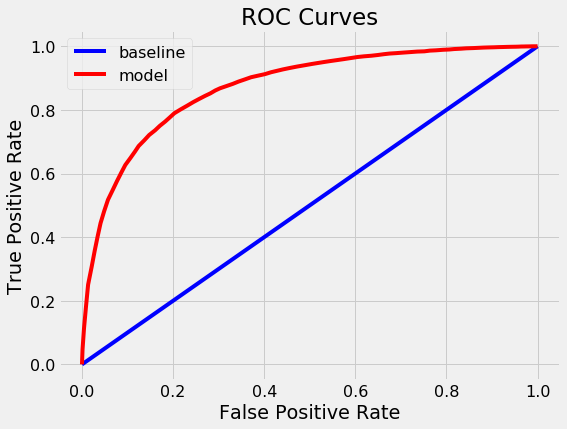

Confusion matrix, without normalization
[[ 2438  3136]
 [ 1043 23299]]


<Figure size 432x288 with 0 Axes>

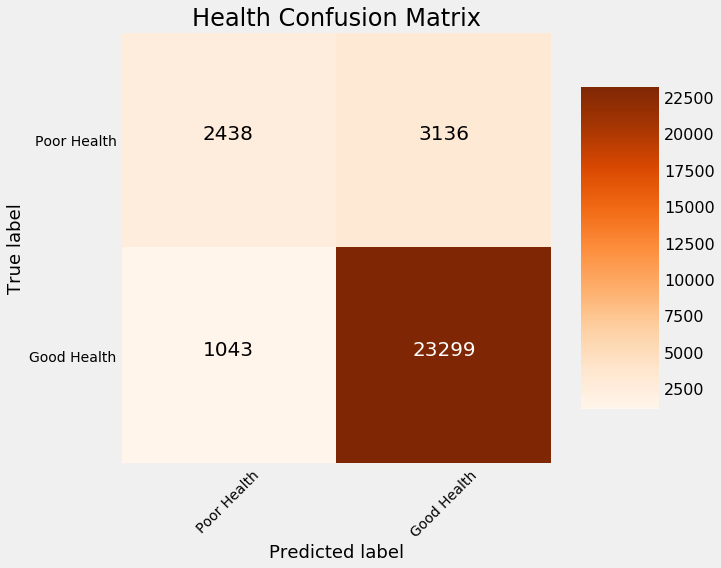

In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

RSEED = 50

# Load in data
df = pd.read_csv('https://s3.amazonaws.com/projects-rf/clean_data.csv')

# Full dataset: https://www.kaggle.com/cdc/behavioral-risk-factor-surveillance-system

# Extract the labels
labels = np.array(df.pop('label'))

# 30% examples in test data
train, test, train_labels, test_labels = train_test_split(df,
                                         labels, 
                                         stratify = labels,
                                         test_size = 0.3, 
                                         random_state = RSEED)

# Imputation of missing values
train = train.fillna(train.mean())
test = test.fillna(test.mean())

# Features for feature importances
features = list(train.columns)

# Create the model with 100 trees
model = RandomForestClassifier(n_estimators=100, 
                               random_state=RSEED, 
                               max_features = 'sqrt',
                               n_jobs=-1, verbose = 1)

# Fit on training data
model.fit(train, train_labels)


n_nodes = []
max_depths = []

# Stats about the trees in random forest
for ind_tree in model.estimators_:
    n_nodes.append(ind_tree.tree_.node_count)
    max_depths.append(ind_tree.tree_.max_depth)
    
print('Average number of nodes',{int(np.mean(n_nodes))})
print('Average maximum depth',{int(np.mean(max_depths))})

# Training predictions (to demonstrate overfitting)
train_rf_predictions = model.predict(train)
train_rf_probs = model.predict_proba(train)[:, 1]

# Testing predictions (to determine performance)
rf_predictions = model.predict(test)
rf_probs = model.predict_proba(test)[:, 1]

from sklearn.metrics import precision_score, recall_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Plot formatting
plt.style.use('fivethirtyeight')
plt.rcParams['font.size'] = 18

def evaluate_model(predictions, probs, train_predictions, train_probs):
    """Compare machine learning model to baseline performance.
    Computes statistics and shows ROC curve."""
    
    baseline = {}
    
    baseline['recall'] = recall_score(test_labels, 
                                     [1 for _ in range(len(test_labels))])
    baseline['precision'] = precision_score(test_labels, 
                                      [1 for _ in range(len(test_labels))])
    baseline['roc'] = 0.5
    
    results = {}
    
    results['recall'] = recall_score(test_labels, predictions)
    results['precision'] = precision_score(test_labels, predictions)
    results['roc'] = roc_auc_score(test_labels, probs)
    
    train_results = {}
    train_results['recall'] = recall_score(train_labels, train_predictions)
    train_results['precision'] = precision_score(train_labels, train_predictions)
    train_results['roc'] = roc_auc_score(train_labels, train_probs)
    
    for metric in ['recall', 'precision', 'roc']:
        print({metric.capitalize()},'Baseline:',{round(baseline[metric], 2)},'Test: ',{round(results[metric], 2)},'Train:', {round(train_results[metric], 2)})
    
    # Calculate false positive rates and true positive rates
    base_fpr, base_tpr, _ = roc_curve(test_labels, [1 for _ in range(len(test_labels))])
    model_fpr, model_tpr, _ = roc_curve(test_labels, probs)

    plt.figure(figsize = (8, 6))
    plt.rcParams['font.size'] = 16
    
    # Plot both curves
    plt.plot(base_fpr, base_tpr, 'b', label = 'baseline')
    plt.plot(model_fpr, model_tpr, 'r', label = 'model')
    plt.legend();
    plt.xlabel('False Positive Rate'); 
    plt.ylabel('True Positive Rate'); plt.title('ROC Curves');
    plt.show();

evaluate_model(rf_predictions, rf_probs, train_rf_predictions, train_rf_probs)
plt.savefig('roc_auc_curve.png')

from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Oranges):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    Source: http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    # Plot the confusion matrix
    plt.figure(figsize = (10, 10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, size = 24)
    plt.colorbar(aspect=4)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45, size = 14)
    plt.yticks(tick_marks, classes, size = 14)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    
    # Labeling the plot
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), fontsize = 20,
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
        
    plt.grid(None)
    plt.tight_layout()
    plt.ylabel('True label', size = 18)
    plt.xlabel('Predicted label', size = 18)

# Confusion matrix
cm = confusion_matrix(test_labels, rf_predictions)
plot_confusion_matrix(cm, classes = ['Poor Health', 'Good Health'],
                      title = 'Health Confusion Matrix')

plt.savefig('cm.png')

In [20]:
sgal_qlabel.keys().values

array([u'CGH_Mtot(Rorbit)[Msun]',
       u'CGH_gas_density(Rorbit+-Rsat)[Msun/kpc^3]', u'Mcg(R1kpc)[Msun]',
       u'Mcg(Reff)[Msun]', u'Mcg(Rsat)[Msun]', u'Mcg(Rsat_0.8)[Msun]',
       u'Mcg(Rzana)[Msun]', u'Mdm(R0.5kpc)[Msun]', u'Mdm(R1kpc)[Msun]',
       u'Mdm(Reff)[Msun]', u'Mdm(Rsat)[Msun]', u'Mdm(Rsat_0.8)[Msun]',
       u'Mdm(Rzana)[Msun]', u'Mgas(R0.5kpc)[Msun]', u'Mgas(R1kpc)[Msun]',
       u'Mgas(Reff)[Msun]', u'Mgas(Rsat)[Msun]', u'Mgas(Rsat_0.8)[Msun]',
       u'Mgas(Rzana)[Msun]', u'Mncg(R0.5kpc)[Msun]', u'Mncg(R1kpc)[Msun]',
       u'Mncg(Reff)[Msun]', u'Mncg(Rsat)[Msun]', u'Mncg(Rsat_0.8)[Msun]',
       u'Mncg(Rzana)[Msun]', u'Mstar(R0.5kpc)[Msun]',
       u'Mstar(R1kpc)[Msun]', u'Mstar(Reff)[Msun]', u'Mstar(Rsat)[Msun]',
       u'Mstar(Rsat_0.8)[Msun]', u'Mstar(Rzana)[Msun]',
       u'Mstar_young(R0.5kpc)[Msun]', u'Mstar_young(R1kpc)[Msun]',
       u'Mstar_young(Reff)[Msun]', u'Mstar_young(Rsat)[Msun]',
       u'Mstar_young(Rsat_0.8)[Msun]', u'Mstar_young(Rzana)[Msun]',

In [29]:
sgal_qlabel['Rorbit(peri_1)[kpc]'].dtype
sgal_qlabel['Mcg(Rcoldgass_0.9)[Msun]'].dtype

dtype('O')

In [42]:
from sklearn import preprocessing

In [ ]:
df['col']=(df['col']-df['col'].min())/(df['col'].max()-df['col'].min())

In [56]:
X = sgal_qlabel[['Rorbit(peri_1)[kpc]','Mtot(rvir)[Msun]','Mdm(Reff)[Msun]']]
normalized_X = preprocessing.normalize(X)
standardized_X = preprocessing.scale(X)
normalized_X, np.var(normalized_X)

/vol/sci/astro/home/adambeilialpha/.local/lib/python2.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype float64, object were all converted to float64 by the scale function.
  This is separate from the ipykernel package so we can avoid doing imports until
/cs/sci/sharonl/miniconda/envs/iyt32/lib/python2.7/site-packages/sklearn/preprocessing/data.py:176: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


(array([[  7.60546833e-11,   9.99999239e-01,   1.23389600e-03],
        [  2.53680397e-10,   9.99973691e-01,   7.25378314e-03],
        [  2.60651003e-10,   9.99999466e-01,   1.03378758e-03],
        [  1.54909145e-10,   9.99999856e-01,   5.36792085e-04],
        [  9.81380143e-11,   9.99999838e-01,   5.69646426e-04],
        [  1.45931652e-10,   9.99999167e-01,   1.29051673e-03],
        [  9.40410372e-11,   9.99998412e-01,   1.78234340e-03],
        [  7.64097950e-11,   9.99996166e-01,   2.76928296e-03],
        [  1.61528536e-10,   9.99987101e-01,   5.07909321e-03],
        [  4.85791337e-10,   9.99975349e-01,   7.02144940e-03],
        [  1.14852498e-10,   9.99995050e-01,   3.14643352e-03],
        [  6.37328542e-11,   9.99999165e-01,   1.29196025e-03],
        [  1.21401843e-10,   9.99995887e-01,   2.86819676e-03],
        [  7.66626981e-11,   9.99991223e-01,   4.18965184e-03],
        [  5.24585656e-11,   9.99998868e-01,   1.50474951e-03],
        [  4.99196146e-11,   9.99995429e

In [57]:
standardized_X, np.var(standardized_X)

(array([[ -1.11980971e-01,  -1.24951662e-01,  -3.43804210e-02],
        [ -1.95913515e-01,  -1.00389283e+00,   4.07809987e-01],
        [ -5.41729322e-01,  -1.11927375e+00,  -6.24368893e-01],
        [  6.15582794e-01,  -3.68208874e-01,  -4.88742434e-01],
        [ -7.16340947e-01,  -8.92478475e-01,  -6.12464796e-01],
        [  1.29833181e-01,  -5.75070080e-01,  -2.71927355e-01],
        [ -9.79682200e-01,  -1.09732242e+00,  -5.28734852e-01],
        [ -5.18539927e-01,  -5.57071446e-01,   2.77667438e-01],
        [ -5.46466938e-01,  -9.84739246e-01,   1.11411335e-01],
        [ -5.88355597e-01,  -1.23035282e+00,  -3.66491366e-01],
        [ -7.02788743e-01,  -9.48492333e-01,  -1.56363982e-01],
        [ -1.00299651e+00,  -1.01012041e+00,  -5.32212453e-01],
        [ -5.97510617e-01,  -9.00234774e-01,  -1.42988591e-01],
        [ -6.20603257e-02,  -8.24255107e-02,   1.71792948e+00],
        [  8.73989094e-01,   1.92907357e+00,   1.55274341e+00],
        [ -1.80697396e-01,   4.02070958e

In [33]:
sgal_qlabel['Mcg(Rcoldgass_0.9)[Msun]'].fillna(0)

tgid
VELA_v2.Thick.01_tmp_00003    8.009759e+07
VELA_v2.Thick.01_tmp_00010    3.698963e+07
VELA_v2.Thick.01_tmp_00012    0.000000e+00
VELA_v2.Thick.01_tmp_00013    2.294964e+07
VELA_v2.Thick.02_tmp_00001    9.872727e+05
VELA_v2.Thick.02_tmp_00004    3.889824e+07
VELA_v2.Thick.02_tmp_00009    9.495382e+06
VELA_v2.Thick.03_tmp_00009    2.465074e+08
VELA_v2.Thick.03_tmp_00014    6.717259e+07
VELA_v2.Thick.04_tmp_00002    2.402151e+07
VELA_v2.Thick.04_tmp_00003    2.140928e+07
VELA_v2.Thick.04_tmp_00005    9.970777e+05
VELA_v2.Thick.04_tmp_00009    5.496975e+07
VELA_v2.Thick.06_tmp_00060    1.282407e+09
VELA_v2.Thick.07_tmp_00002    1.154716e+08
VELA_v2.Thick.07_tmp_00013    2.803305e+08
VELA_v2.Thick.07_tmp_00014    1.829070e+08
VELA_v2.Thick.07_tmp_00020    0.000000e+00
VELA_v2.Thick.07_tmp_00027    9.150938e+06
VELA_v2.Thick.07_tmp_00029    0.000000e+00
VELA_v2.Thick.07_tmp_00031    1.087739e+09
VELA_v2.Thick.07_tmp_00033    7.083895e+06
VELA_v2.Thick.07_tmp_00040    7.336209e+07
VELA_v

In [30]:
sgal_qlabel[['Mcg(Rcoldgass_0.9)[Msun]','Rorbit(peri_1)[kpc]']]

,Mcg(Rcoldgass_0.9)[Msun],Rorbit(peri_1)[kpc]
tgid,,
VELA_v2.Thick.01_tmp_00003,8.00976e+07,26.703580
VELA_v2.Thick.01_tmp_00010,3.69896e+07,24.763384
VELA_v2.Thick.01_tmp_00012,NaN,16.769460
VELA_v2.Thick.01_tmp_00013,2.29496e+07,43.522040
VELA_v2.Thick.02_tmp_00001,987273,12.733115
VELA_v2.Thick.02_tmp_00004,3.88982e+07,32.293388
VELA_v2.Thick.02_tmp_00009,9.49538e+06,6.645684
VELA_v2.Thick.03_tmp_00009,2.46507e+08,17.305510
VELA_v2.Thick.03_tmp_00014,6.71726e+07,16.659945


In [60]:
sgal_qlabel['col_1'] = np.log(sgal_qlabel['Mcg(Rcoldgass_0.9)[Msun]'].fillna(1.0))
sgal_qlabel['col_2'] = np.log(sgal_qlabel['Rorbit(peri_1)[kpc]'])

In [61]:
sgal_qlabel['col_1']

tgid
VELA_v2.Thick.01_tmp_00003    18.198756
VELA_v2.Thick.01_tmp_00010    17.426148
VELA_v2.Thick.01_tmp_00012     0.000000
VELA_v2.Thick.01_tmp_00013    16.948813
VELA_v2.Thick.02_tmp_00001    13.802702
VELA_v2.Thick.02_tmp_00004    17.476460
VELA_v2.Thick.02_tmp_00009    16.066316
VELA_v2.Thick.03_tmp_00009    19.322903
VELA_v2.Thick.03_tmp_00014    18.022776
VELA_v2.Thick.04_tmp_00002    16.994460
VELA_v2.Thick.04_tmp_00003    16.879335
VELA_v2.Thick.04_tmp_00005    13.812584
VELA_v2.Thick.04_tmp_00009    17.822294
VELA_v2.Thick.06_tmp_00060    20.972005
VELA_v2.Thick.07_tmp_00002    18.564535
VELA_v2.Thick.07_tmp_00013    19.451480
VELA_v2.Thick.07_tmp_00014    19.024488
VELA_v2.Thick.07_tmp_00020     0.000000
VELA_v2.Thick.07_tmp_00027    16.029367
VELA_v2.Thick.07_tmp_00029     0.000000
VELA_v2.Thick.07_tmp_00031    20.807367
VELA_v2.Thick.07_tmp_00033    15.773335
VELA_v2.Thick.07_tmp_00040    18.110918
VELA_v2.Thick.07_tmp_00041    17.868153
VELA_v2.Thick.07_tmp_00045    16.55

In [62]:

print np.var(sgal_qlabel[['Mcg(Rcoldgass_0.9)[Msun]','Rorbit(peri_1)[kpc]']])
print np.var(sgal_qlabel[['col_1','col_2']])

Mcg(Rcoldgass_0.9)[Msun]    3.381716e+16
Rorbit(peri_1)[kpc]         5.343556e+02
dtype: float64
col_1    35.986838
col_2     0.408678
dtype: float64


#    Correlation Graph

/cs/sci/adambeilialpha/.local/lib/python2.7/site-packages/matplotlib/font_manager.py:283: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  'Matplotlib is building the font cache using fc-list. '


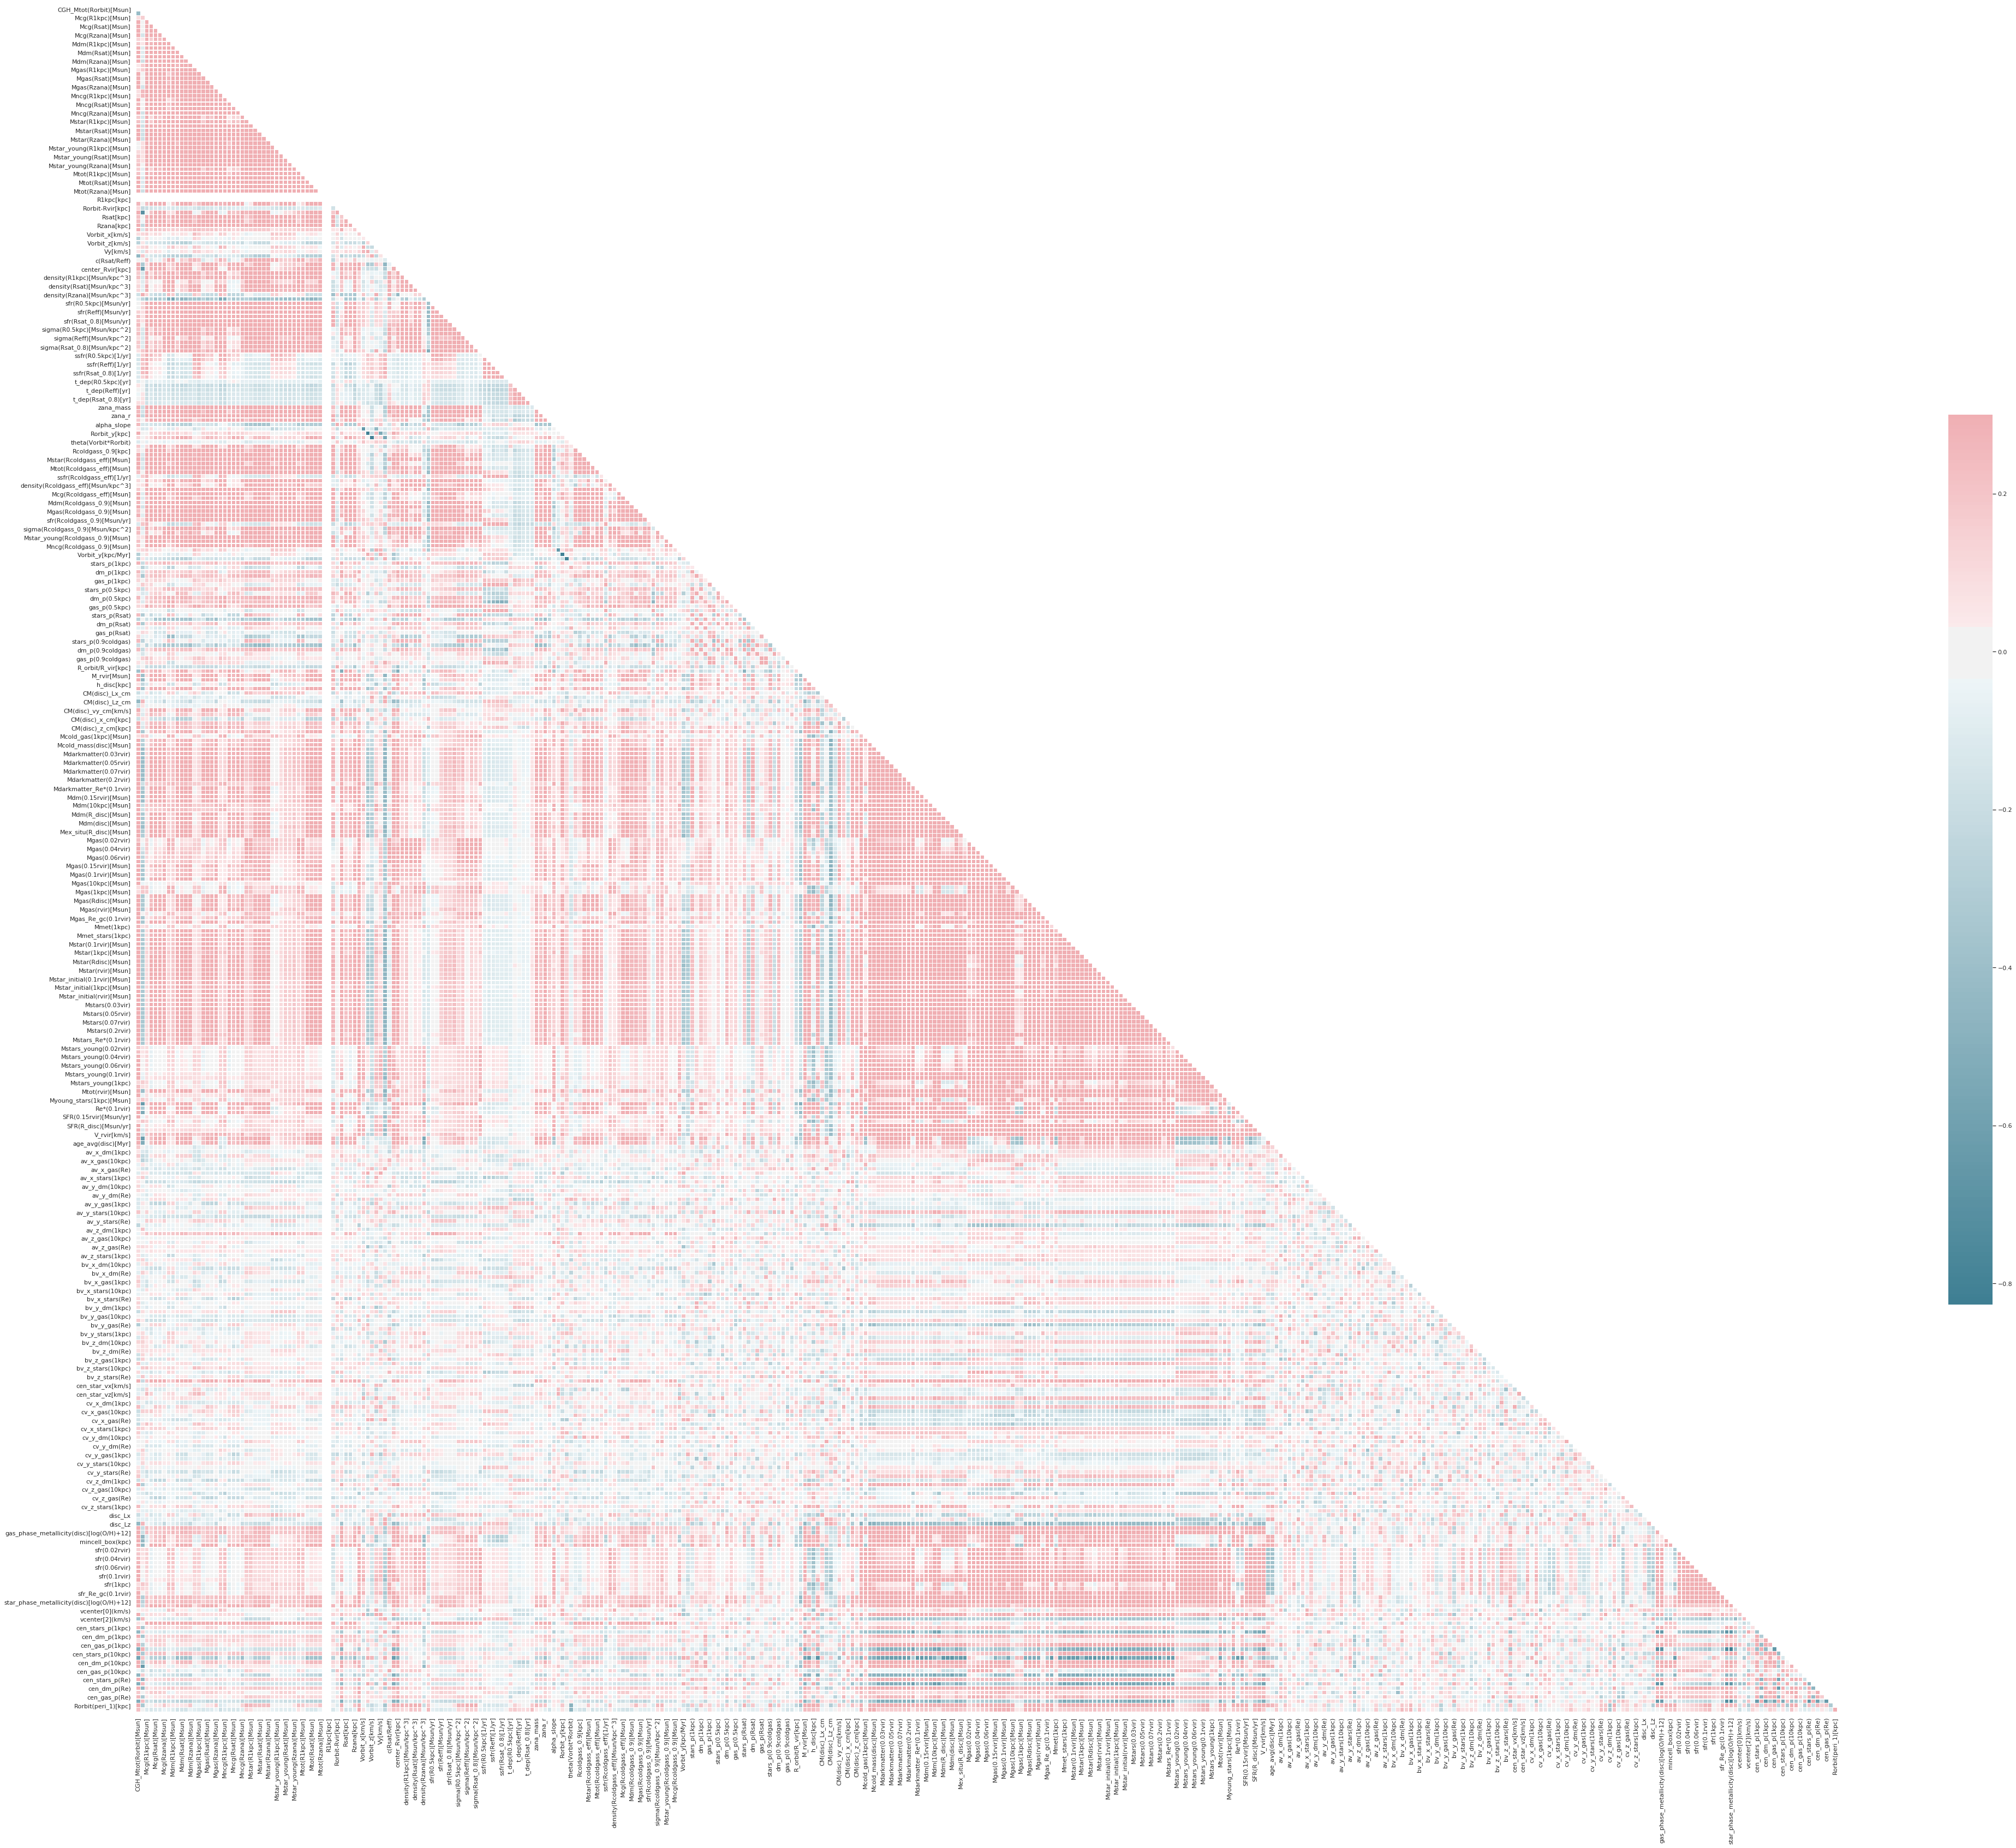

In [11]:
from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="white")

sgal_qlabel
sgal_qlabel_surv = sgal_qlabel.loc[sgal_qlabel['qlabel(1|4)']!=0]
sgal_qlabel_surv = sgal_qlabel_surv.replace([np.inf, -np.inf], np.nan).dropna()
sgal_qlabel_surv = sgal_qlabel_surv.reset_index().drop(['tgid'],axis=1)

# Compute the correlation matrix
corr = sgal_qlabel_surv.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(70, 60))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [12]:
#Baseline
mask=(corr['qlabel(1|4)']**2)>=0.1
important_features = corr['qlabel(1|4)'][mask]

In [16]:
important_features

Mcg(R1kpc)[Msun]                      0.414850
Mcg(Reff)[Msun]                       0.404425
Mcg(Rsat)[Msun]                       0.504964
Mcg(Rsat_0.8)[Msun]                   0.491784
Mcg(Rzana)[Msun]                      0.537712
Mdm(R0.5kpc)[Msun]                    0.465957
Mdm(R1kpc)[Msun]                      0.505645
Mdm(Reff)[Msun]                       0.472982
Mdm(Rsat)[Msun]                       0.520680
Mdm(Rsat_0.8)[Msun]                   0.525734
Mdm(Rzana)[Msun]                      0.548023
Mgas(R0.5kpc)[Msun]                   0.386096
Mgas(R1kpc)[Msun]                     0.414477
Mgas(Reff)[Msun]                      0.403780
Mgas(Rsat)[Msun]                      0.502384
Mgas(Rsat_0.8)[Msun]                  0.489752
Mgas(Rzana)[Msun]                     0.535680
Mncg(R0.5kpc)[Msun]                   0.379651
Mncg(R1kpc)[Msun]                     0.319389
Mncg(Reff)[Msun]                      0.373362
Mncg(Rsat)[Msun]                      0.436397
Mncg(Rsat_0.8

In [14]:
sgal_qlabel_surv


,CGH_Mtot(Rorbit)[Msun],CGH_gas_density(Rorbit+-Rsat)[Msun/kpc^3],Mcg(R1kpc)[Msun],Mcg(Reff)[Msun],Mcg(Rsat)[Msun],Mcg(Rsat_0.8)[Msun],Mcg(Rzana)[Msun],Mdm(R0.5kpc)[Msun],Mdm(R1kpc)[Msun],Mdm(Reff)[Msun],Mdm(Rsat)[Msun],Mdm(Rsat_0.8)[Msun],Mdm(Rzana)[Msun],Mgas(R0.5kpc)[Msun],Mgas(R1kpc)[Msun],Mgas(Reff)[Msun],Mgas(Rsat)[Msun],Mgas(Rsat_0.8)[Msun],Mgas(Rzana)[Msun],Mncg(R0.5kpc)[Msun],Mncg(R1kpc)[Msun],Mncg(Reff)[Msun],Mncg(Rsat)[Msun],Mncg(Rsat_0.8)[Msun],Mncg(Rzana)[Msun],Mstar(R0.5kpc)[Msun],Mstar(R1kpc)[Msun],Mstar(Reff)[Msun],Mstar(Rsat)[Msun],Mstar(Rsat_0.8)[Msun],Mstar(Rzana)[Msun],Mstar_young(R0.5kpc)[Msun],Mstar_young(R1kpc)[Msun],Mstar_young(Reff)[Msun],Mstar_young(Rsat)[Msun],Mstar_young(Rsat_0.8)[Msun],Mstar_young(Rzana)[Msun],Mtot(R0.5kpc)[Msun],Mtot(R1kpc)[Msun],Mtot(Reff)[Msun],Mtot(Rsat)[Msun],Mtot(Rsat_0.8)[Msun],Mtot(Rzana)[Msun],R0.5kpc[kpc],R1kpc[kpc],Reff[kpc],Rorbit-Rvir[kpc],Rorbit[kpc],Rsat[kpc],Rsat_0.8[kpc],Rzana[kpc],Vorbit[km/s],Vorbit_x[km/s],Vorbit_y[km/s],Vorbit_z[km/s],Vx[km/s],Vy[km/s],Vz[km/s],c(Rsat/Reff),center_Mstar(0.1rvir)[Msun],center_Rvir[kpc],density(R0.5kpc)[Msun/kpc^3],density(R1kpc)[Msun/kpc^3],density(Reff)[Msun/kpc^3],density(Rsat)[Msun/kpc^3],density(Rsat_0.8)[Msun/kpc^3],density(Rzana)[Msun/kpc^3],mincell(Rsat)[kpc],sfr(R0.5kpc)[Msun/yr],sfr(R1kpc)[Msun/yr],sfr(Reff)[Msun/yr],sfr(Rsat)[Msun/yr],sfr(Rsat_0.8)[Msun/yr],sfr(Rzana)[Msun/yr],sigma(R0.5kpc)[Msun/kpc^2],sigma(R1kpc)[Msun/kpc^2],sigma(Reff)[Msun/kpc^2],sigma(Rsat)[Msun/kpc^2],sigma(Rsat_0.8)[Msun/kpc^2],sigma(Rzana)[Msun/kpc^2],ssfr(R0.5kpc)[1/yr],ssfr(R1kpc)[1/yr],ssfr(Reff)[1/yr],ssfr(Rsat)[1/yr],ssfr(Rsat_0.8)[1/yr],ssfr(Rzana)[1/yr],t_dep(R0.5kpc)[yr],t_dep(R1kpc)[yr],t_dep(Reff)[yr],t_dep(Rsat)[yr],t_dep(Rsat_0.8)[yr],t_dep(Rzana)[yr],zana_mass,zana_n_stars,zana_r,R_cg_eff(approx)[kpc],alpha_slope,Rorbit_x[kpc],Rorbit_y[kpc],Rorbit_z[kpc],theta(Vorbit*Rorbit),Rcoldgass_eff[kpc],Rcoldgass_0.9[kpc],Mdm(Rcoldgass_eff)[Msun],Mstar(Rcoldgass_eff)[Msun],Mgas(Rcoldgass_eff)[Msun],Mtot(Rcoldgass_eff)[Msun],sfr(Rcoldgass_eff)[Msun/yr],ssfr(Rcoldgass_eff)[1/yr],sigma(Rcoldgass_eff)[Msun/kpc^2],density(Rcoldgass_eff)[Msun/kpc^3],Mstar_young(Rcoldgass_eff)[Msun],Mcg(Rcoldgass_eff)[Msun],Mncg(Rcoldgass_eff)[Msun],Mdm(Rcoldgass_0.9)[Msun],Mstar(Rcoldgass_0.9)[Msun],Mgas(Rcoldgass_0.9)[Msun],Mtot(Rcoldgass_0.9)[Msun],sfr(Rcoldgass_0.9)[Msun/yr],ssfr(Rcoldgass_0.9)[1/yr],sigma(Rcoldgass_0.9)[Msun/kpc^2],density(Rcoldgass_0.9)[Msun/kpc^3],Mstar_young(Rcoldgass_0.9)[Msun],Mcg(Rcoldgass_0.9)[Msun],Mncg(Rcoldgass_0.9)[Msun],Vorbit_x[kpc/Myr],Vorbit_y[kpc/Myr],Vorbit_z[kpc/Myr],stars_p(1kpc),stars_q(1kpc),dm_p(1kpc),dm_q(1kpc),gas_p(1kpc),gas_q(1kpc),stars_p(0.5kpc),stars_q(0.5kpc),dm_p(0.5kpc),dm_q(0.5kpc),gas_p(0.5kpc),gas_q(0.5kpc),stars_p(Rsat),stars_q(Rsat),dm_p(Rsat),dm_q(Rsat),gas_p(Rsat),gas_q(Rsat),stars_p(0.9coldgas),stars_q(0.9coldgas),dm_p(0.9coldgas),dm_q(0.9coldgas),gas_p(0.9coldgas),gas_q(0.9coldgas),R_orbit/R_vir[kpc],Rsat/Rvir[kpc],M_rvir[Msun],R(disc)[kpc],h_disc[kpc],CM(disc)_L_mag[kpc&km/s],CM(disc)_Lx_cm,CM(disc)_Ly_cm,CM(disc)_Lz_cm,CM(disc)_vx_cm[km/s],CM(disc)_vy_cm[km/s],CM(disc)_vz_cm[km/s],CM(disc)_x_cm[kpc],CM(disc)_y_cm[kpc],CM(disc)_z_cm[kpc],Mcold_gas(0.15rvir)[Msun],Mcold_gas(1kpc)[Msun],Mcold_mass(R_disc)[Msun],Mcold_mass(disc)[Msun],Mdarkmatter(0.02rvir),Mdarkmatter(0.03rvir),Mdarkmatter(0.04rvir),Mdarkmatter(0.05rvir),Mdarkmatter(0.06rvir),Mdarkmatter(0.07rvir),Mdarkmatter(0.1rvir),Mdarkmatter(0.2rvir),Mdarkmatter(1kpc),Mdarkmatter_Re*(0.1rvir),Mdarkmatter_Re_gc(0.1rvir),Mdm(0.15rvir)[Msun],Mdm(0.1rvir)[Msun],Mdm(10kpc)[Msun],Mdm(1kpc)[Msun],Mdm(R_disc)[Msun],Mdm(Rdisc)[Msun],Mdm(disc)[Msun],Mdm(rvir)[Msun],Mex_situ(R_disc)[Msun],Mex_situ(disc)[Msun],Mgas(0.02rvir),Mgas(0.03rvir),Mgas(0.04rvir),Mgas(0.05rvir),Mgas(0.06rvir),Mgas(0.07rvir),Mgas(0.15rvir)[Msun],Mgas(0.1rvir),Mgas(0.1rvir)[Msun],Mgas(0.2rvir),Mgas(10kpc)[Msun],Mgas(1kpc),Mgas(1kpc)[Msun],Mgas(R_disc)[Msun],Mgas(Rdisc)[Msun],Mgas(disc)[Ms